In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [86]:
import pandas as pd

dataTrain = pd.read_csv(r'D:\personal/Train_Laptop.csv')

dataTrain.loc[:,'Series'] = dataTrain['Series'].fillna(method='ffill')
dataTrain.loc[:,'Series'] = dataTrain['Series'].fillna(method='bfill')

dataTrain.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,15,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,15,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,15,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [87]:
type(dataTrain)  #data type

pandas.core.frame.DataFrame

In [88]:
dataTrain.shape # check dimension

(99, 11)

In [89]:
dataTest = pd.read_csv(r'D:\personal/Test_Laptop.csv')

dataTest.loc[:,'Series'] = dataTest['Series'].fillna(method='ffill')
dataTest.loc[:,'Series'] = dataTest['Series'].fillna(method='bfill')
dataTest.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,99,DELL,Vostro,Slim,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
1,100,Lenovo,IdeaPad,Slim,i3,11th,8.0,512 GB SSD,Windows 10 Home,4.4,45440
2,101,DELL,Vostro,Slim,i3,10th,8.0,512 GB SSD,Windows 10,3.9,43040
3,102,MICROSOFT,Surface,Laptop,i5,8th,8.0,128 GB SSD,Windows 10 Home,4.5,91949
4,103,ASUS,ROG,Strix,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.6,75940


In [90]:
dataTest.shape

(31, 11)

In [91]:
dataTrain.isnull().sum()

Unnamed: 0             0
Brand                  0
Model                 12
Series                 0
Processor              6
Processor_Gen          6
RAM                    7
Hard_Disk_Capacity     7
OS                     7
Rating                 0
Price                  0
dtype: int64

In [92]:
dataTest.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 2
Series                0
Processor             1
Processor_Gen         1
RAM                   1
Hard_Disk_Capacity    1
OS                    1
Rating                0
Price                 0
dtype: int64

In [93]:
dataTrain = dataTrain.dropna()
dataTest = dataTest.dropna()

In [94]:
dataTrain.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Series                0
Processor             0
Processor_Gen         0
RAM                   0
Hard_Disk_Capacity    0
OS                    0
Rating                0
Price                 0
dtype: int64

In [95]:
dataTrain.shape # 15 rows removed

(80, 11)

In [96]:
dataTest.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Series                0
Processor             0
Processor_Gen         0
RAM                   0
Hard_Disk_Capacity    0
OS                    0
Rating                0
Price                 0
dtype: int64

In [97]:
dataTest.shape  # 5 rows removed

(28, 11)

In [98]:
dataTrain.dtypes  # checking the data type of every column

Unnamed: 0              int64
Brand                  object
Model                  object
Series                 object
Processor              object
Processor_Gen          object
RAM                   float64
Hard_Disk_Capacity     object
OS                     object
Rating                float64
Price                   int64
dtype: object

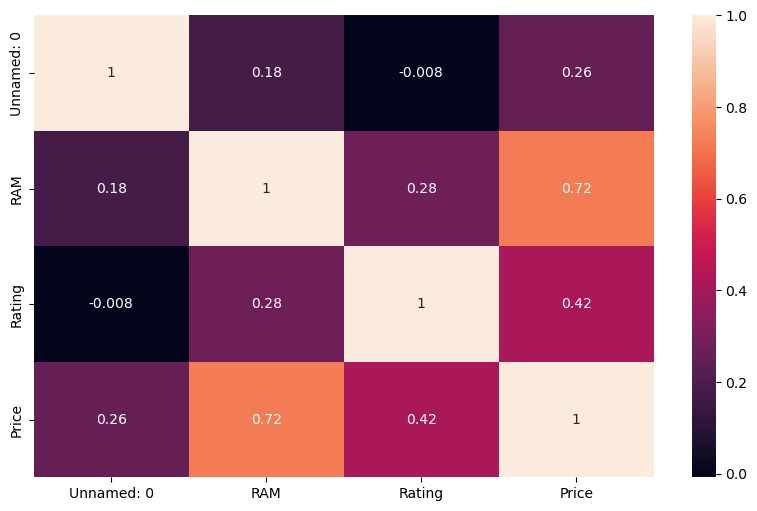

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr()
##This is a pandas DataFrame method that is used to calculate the correlation between variables in the DataFrame.
sns.heatmap(corr,annot=True)
plt.show()

In [100]:
 dataTrain.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,Unnamed: 0,RAM,Rating,Price
count,80.000000,80.000000,80.000000,80.000000
mean,47.600000,8.950000,4.223750,50322.562500
std,28.152208,3.321964,0.290021,13956.133107
min,0.000000,4.000000,3.600000,23490.000000
25%,24.750000,8.000000,4.100000,39040.000000
50%,48.500000,8.000000,4.300000,46940.000000
75%,69.500000,8.000000,4.400000,59347.500000
max,97.000000,16.000000,4.800000,98140.000000


In [101]:
#Search for price = 1 , if so, change the price to 500
dataTrain.loc[dataTrain['Price'] == 1, 'Price'] = 500

In [102]:
dataTrain.describe()  # now still the minimum price is 1.42 USD

,Unnamed: 0,RAM,Rating,Price
count,80.000000,80.000000,80.000000,80.000000
mean,47.600000,8.950000,4.223750,50322.562500
std,28.152208,3.321964,0.290021,13956.133107
min,0.000000,4.000000,3.600000,23490.000000
25%,24.750000,8.000000,4.100000,39040.000000
50%,48.500000,8.000000,4.300000,46940.000000
75%,69.500000,8.000000,4.400000,59347.500000
max,97.000000,16.000000,4.800000,98140.000000


In [103]:
#Search for price < 500 , if so, change the price to 500
dataTrain.loc[dataTrain['Price'] < 500, 'Price'] = 500

In [104]:
dataTrain.describe()  # now the minimum price is 500 USD

,Unnamed: 0,RAM,Rating,Price
count,80.000000,80.000000,80.000000,80.000000
mean,47.600000,8.950000,4.223750,50322.562500
std,28.152208,3.321964,0.290021,13956.133107
min,0.000000,4.000000,3.600000,23490.000000
25%,24.750000,8.000000,4.100000,39040.000000
50%,48.500000,8.000000,4.300000,46940.000000
75%,69.500000,8.000000,4.400000,59347.500000
max,97.000000,16.000000,4.800000,98140.000000


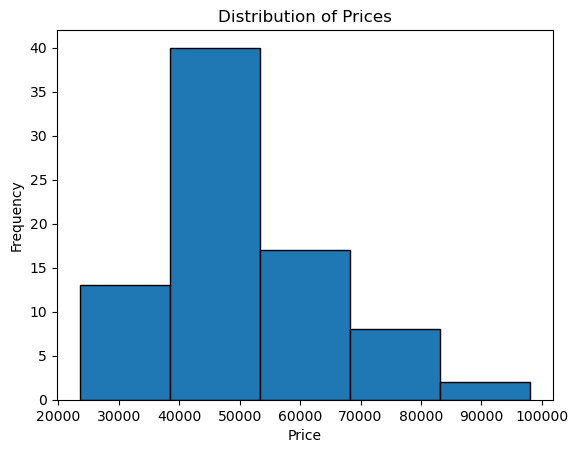

In [105]:
import matplotlib.pyplot as plt

dataTrain['Price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [106]:
dataTrain.describe(include = 'object') #summary statistics for categorical values

,Brand,Model,Series,Processor,Processor_Gen,Hard_Disk_Capacity,OS
count,80,80,80,80,80,80,80
unique,7,20,23,14,6,5,6
top,DELL,Inspiron,15,i3,11th,512 GB SSD,Windows 10 Home
freq,29,22,14,35,47,33,32


<Axes: xlabel='RAM', ylabel='Price'>

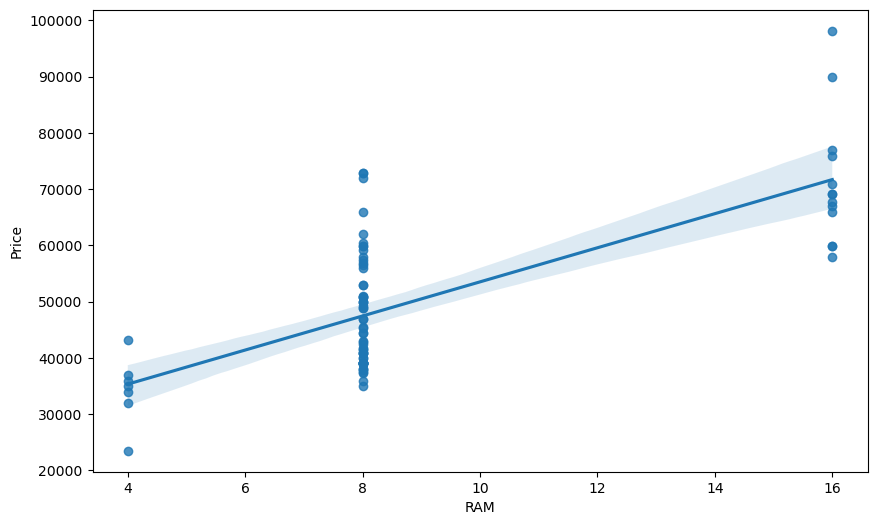

In [107]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="RAM", y="Price", data=dataTrain)

In [108]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['RAM'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7212351635570904  with a P-value of P = 4.50401030941484e-14


<Axes: xlabel='RAM', ylabel='Price'>

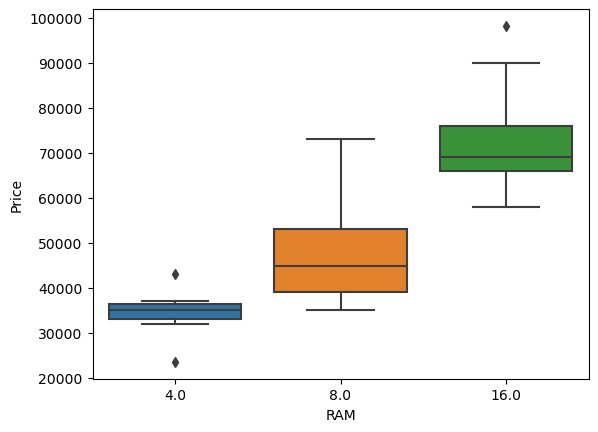

In [109]:
sns.boxplot(x="RAM", y="Price", data=dataTrain)

<Axes: xlabel='RAM', ylabel='Price'>

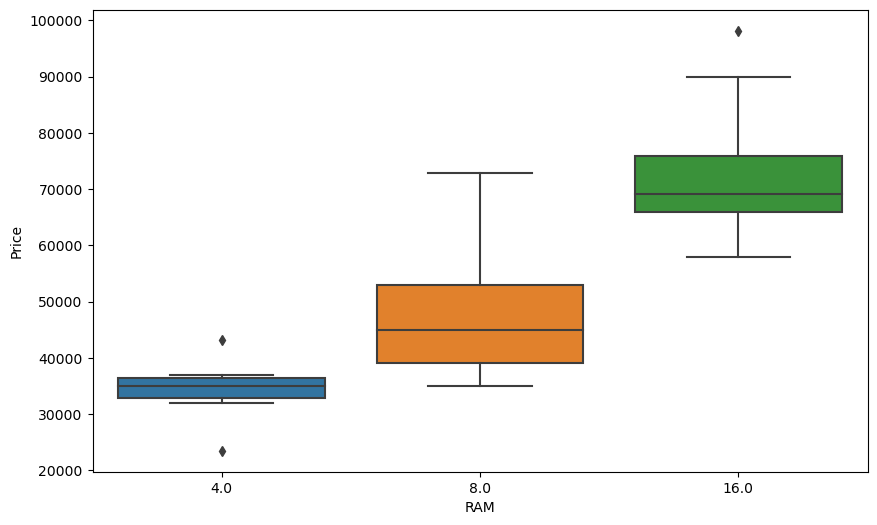

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(x="RAM", y="Price", data=dataTrain)

In [111]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.Brand = labelencoder.fit_transform(dataTrain.Brand)
dataTrain.Model = labelencoder.fit_transform(dataTrain.Model)
dataTrain.Processor = labelencoder.fit_transform(dataTrain.Processor)
dataTrain.RAM = labelencoder.fit_transform(dataTrain.RAM)


In [112]:
labelencoder1 = LabelEncoder()
dataTest.Brand = labelencoder1.fit_transform(dataTest.Brand)
dataTest.Model = labelencoder1.fit_transform(dataTest.Model)
dataTest.Processor = labelencoder1.fit_transform(dataTest.Processor)
dataTest.RAM = labelencoder1.fit_transform(dataTest.RAM)



In [113]:
dataTrain.head(10)

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,1,8,15,11,11th,1,1 TB HDD,Windows 11 Home,3.7,39040
1,1,1,19,15,12,11th,1,1 TB HDD,Windows 10 Home,3.6,50840
2,2,0,17,15,11,10th,1,512 GB SSD,Windows 11 Home,4.3,37940
3,3,1,8,15,11,11th,1,1 TB HDD,256 GB SSD,4.4,44440
4,4,0,15,Gaming,12,10th,1,512 GB SSD,Windows 10 Home,4.5,57940
5,5,0,14,3,2,3rd,1,256 GB SSD,Windows 10 Home,4.3,35940
6,6,1,8,Athlon,1,-,0,256 GB SSD,Windows 11 Home,4.2,33940
7,7,1,8,Athlon,12,11th,2,512 GB SSD,Windows 10,4.2,69040
8,8,3,6,3,11,10th,1,1 TB HDD,Windows 10 Home,4.1,37440
11,11,3,6,3,11,11th,1,256 GB SSD,Windows 11 Home,4.2,40940


In [114]:
dataTest.head(10)

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,99,1,16,Slim,4,11th,1,1 TB HDD,Windows 10 Home,3.6,50840
1,100,3,8,Slim,3,11th,1,512 GB SSD,Windows 10 Home,4.4,45440
2,101,1,16,Slim,3,10th,1,512 GB SSD,Windows 10,3.9,43040
3,102,4,12,Laptop,4,8th,1,128 GB SSD,Windows 10 Home,4.5,91949
4,103,0,11,Strix,4,10th,1,512 GB SSD,Windows 10 Home,4.6,75940
5,104,0,15,14,0,(8,1,256 GB SSD,Windows 11 Home,4.3,32940
6,105,2,5,14,4,10th,1,512 GB SSD,Windows 10 Home,4.3,74940
7,106,5,13,3,4,8th,1,1 TB HDD,128 GB SSD,4.6,59940
8,107,1,10,3,4,11th,1,1 TB HDD,256 GB SSD,4.2,63610
9,108,2,6,Pavilion,4,11th,2,512 GB SSD,Windows 10 Home,4.5,71940


In [115]:
# Selecting only numeric columns for z-score calculation
numeric_cols = dataTrain.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores only for numeric columns
dataTrain[numeric_cols] = dataTrain[numeric_cols].apply(stats.zscore)
dataTest[numeric_cols] = dataTest[numeric_cols].apply(stats.zscore)

In [116]:
dataTrain

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,-1.701476,1,8,15,11,11th,-0.151717,1 TB HDD,Windows 11 Home,-1.817296,-0.813531
1,-1.665731,1,19,15,12,11th,-0.151717,1 TB HDD,Windows 10 Home,-2.164274,0.037310
2,-1.629986,0,17,15,11,10th,-0.151717,512 GB SSD,Windows 11 Home,0.264571,-0.892847
3,-1.594241,1,8,15,11,11th,-0.151717,1 TB HDD,256 GB SSD,0.611548,-0.424163
4,-1.558495,0,15,Gaming,12,10th,-0.151717,512 GB SSD,Windows 10 Home,0.958526,0.549257
...,...,...,...,...,...,...,...,...,...,...,...
92,1.587091,1,19,Macbook,11,11th,-2.174603,1 TB HDD,256 GB SSD,-0.429385,-0.518909
93,1.622837,3,6,5,12,11th,1.871170,512 GB SSD,Windows 10 Home,1.305504,1.486624
95,1.694327,1,8,5,11,11th,-0.151717,1 TB HDD,256 GB SSD,-0.429385,-0.099690
96,1.730073,0,14,5,8,-,-0.151717,512 GB SSD,Windows 10 Home,0.958526,-0.027585


In [117]:
dataTest

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,-1.576988,1,16,Slim,4,11th,0.192450,1 TB HDD,Windows 10 Home,-1.003925,-0.048769
1,-1.465201,3,8,Slim,3,11th,0.192450,512 GB SSD,Windows 10 Home,0.809617,-0.310178
2,-1.353415,1,16,Slim,3,10th,0.192450,512 GB SSD,Windows 10,-0.323847,-0.426360
3,-1.241628,4,12,Laptop,4,8th,0.192450,128 GB SSD,Windows 10 Home,1.036310,1.941283
4,-1.129842,0,11,Strix,4,10th,0.192450,512 GB SSD,Windows 10 Home,1.263003,1.166301
5,-1.018055,0,15,14,0,(8,0.192450,256 GB SSD,Windows 11 Home,0.582924,-0.915293
6,-0.906269,2,5,14,4,10th,0.192450,512 GB SSD,Windows 10 Home,0.582924,1.117892
7,-0.794482,5,13,3,4,8th,0.192450,1 TB HDD,128 GB SSD,1.263003,0.391755
8,-0.682696,1,10,3,4,11th,0.192450,1 TB HDD,256 GB SSD,0.356232,0.569416
9,-0.570909,2,6,Pavilion,4,11th,1.988651,512 GB SSD,Windows 10 Home,1.036310,0.972664


In [118]:
x_train=dataTrain.iloc[:,0:9]
y_train=dataTrain.iloc[:,10]




x_test=dataTest.iloc[:,0:9]
y_test=dataTest.iloc[:,10]

In [119]:
x_train.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS
0,-1.701476,1,8,15,11,11th,-0.151717,1 TB HDD,Windows 11 Home
1,-1.665731,1,19,15,12,11th,-0.151717,1 TB HDD,Windows 10 Home
2,-1.629986,0,17,15,11,10th,-0.151717,512 GB SSD,Windows 11 Home
3,-1.594241,1,8,15,11,11th,-0.151717,1 TB HDD,256 GB SSD
4,-1.558495,0,15,Gaming,12,10th,-0.151717,512 GB SSD,Windows 10 Home


In [120]:
y_train.head()

0   -0.813531
1    0.037310
2   -0.892847
3   -0.424163
4    0.549257
Name: Price, dtype: float64

In [121]:
# Combine training and testing data for consistent encoding
combined = pd.concat([x_train, x_test])
# One-hot encode categorical variables
combined_encoded = pd.get_dummies(combined)
# Split back into training and testing sets
x_train_encoded = combined_encoded.iloc[:len(x_train)]
x_test_encoded = combined_encoded.iloc[len(x_train):]
# Create and train the model
model = LinearRegression()
model_mlr = model.fit(x_train_encoded, y_train)
# Predict and evaluate the model
y_pred1 = model_mlr.predict(x_test_encoded)

In [82]:
from sklearn.linear_model import LinearRegression
x_train = pd.get_dummies(x_train)
y_train = pd.get_dummies(y_train)
x_test = pd.get_dummies(x_test)
model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [122]:
#randomly checking the y-test values
y_test[0]

-0.048768768526348906

In [123]:
#randomly checking the y-pred values
y_pred1[0]

-1.2463171665002017

In [124]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.9955788035633023


In [125]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.7904775646337467


In [128]:
# Combine training and testing data for consistent encoding
combined = pd.concat([x_train, x_test])
# One-hot encode categorical variables
combined_encoded = pd.get_dummies(combined)
# Split back into training and testing sets
x_train_encoded = combined_encoded.iloc[:len(x_train)]
x_test_encoded = combined_encoded.iloc[len(x_train):]
# Create and train the model
rf = RandomForestRegressor()
model_rf = rf.fit(x_train_encoded,y_train)

In [130]:
# Predict and evaluate the model
y_pred2 = model_rf.predict(x_test_encoded)

In [131]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.8073765512758591


In [132]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.6061871605800603


In [133]:
# Combine training and testing data for consistent encoding
combined = pd.concat([x_train, x_test])
# One-hot encode categorical variables
combined_encoded = pd.get_dummies(combined)
# Split back into training and testing sets
x_train_encoded = combined_encoded.iloc[:len(x_train)]
x_test_encoded = combined_encoded.iloc[len(x_train):]
# Create and train the model


LassoModel = Lasso()
model_lm = LassoModel.fit(x_train_encoded,y_train)

In [135]:
y_pred3 = model_lm.predict(x_test_encoded)

In [136]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.7956953964934173


In [137]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.9999999999999994


In [138]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [139]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.790478
1,Random Forest,0.606187
2,LASSO,0.795695


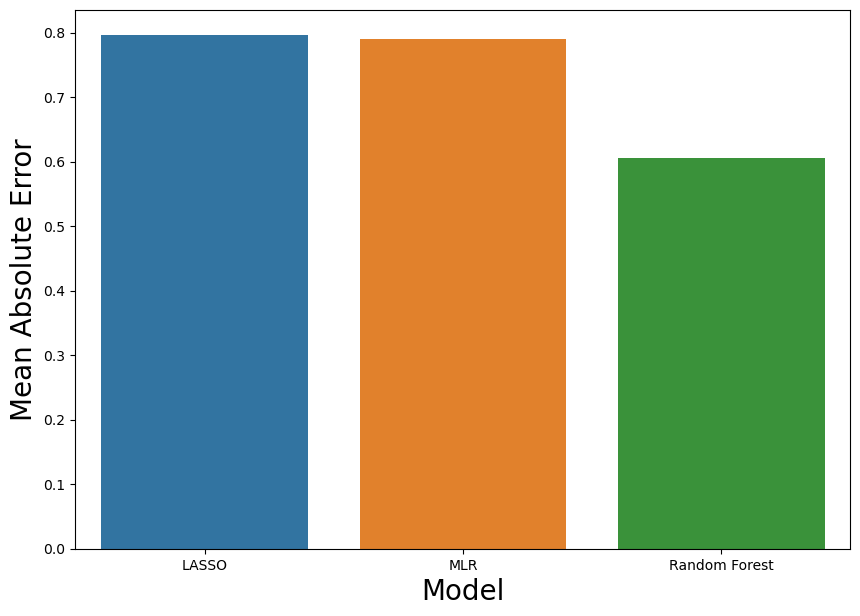

In [140]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()